In [3]:
import numpy
import kagglehub

# Download latest version
relative_path = "malaiarasugraj/global-health-statistics"
path = kagglehub.dataset_download(relative_path)
print("Path to dataset files:", path)

Path to dataset files: C:\Users\glaed\.cache\kagglehub\datasets\malaiarasugraj\global-health-statistics\versions\1


In [4]:
import pandas as pd
import os
file_names = files = os.listdir(path)
file_name=file_names[0]

# Method 1: Using os.name
if os.name == 'nt':  # Windows
    df = pd.read_csv(path+"\\"+file_name)
else:  # Linux/Mac
    df = pd.read_csv(path+"/"+file_name)

print("Datenvorschau:")
print(df.head())  # Zeigt die ersten 5 Zeilen der CSV-Datei

Datenvorschau:
     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Hospital Beds per 1000  Treatment Type  \
0               471007  ...                    7.58   

In [5]:
#Reconfigure Data
column_names = df.columns.tolist()
print("Column names:", column_names)
print(column_names[12])

Column names: ['Country', 'Year', 'Disease Name', 'Disease Category', 'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type', 'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment', 'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)', 'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)']
Hospital Beds per 1000


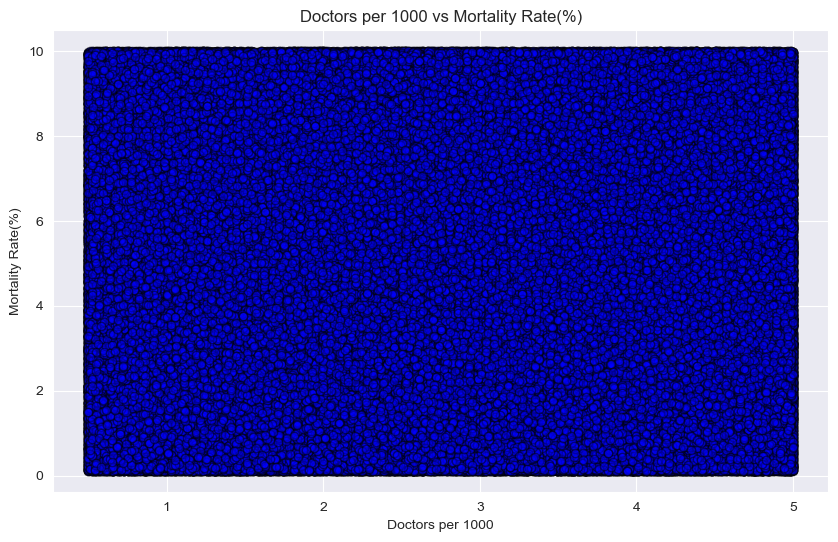

In [6]:
#svm
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Plotting the scatter plot for 'Doctors per 1000' vs 'Mortality Rate(%)'
plt.figure(figsize=(10, 6))
plt.scatter(df[column_names[11]], df[column_names[6]], alpha=0.5, color='blue', edgecolor='k')

# Adding labels and title
plt.xlabel('Doctors per 1000')
plt.ylabel('Mortality Rate(%)')
plt.title('Doctors per 1000 vs Mortality Rate(%)')

plt.show()

C:\Users\glaed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\glaed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


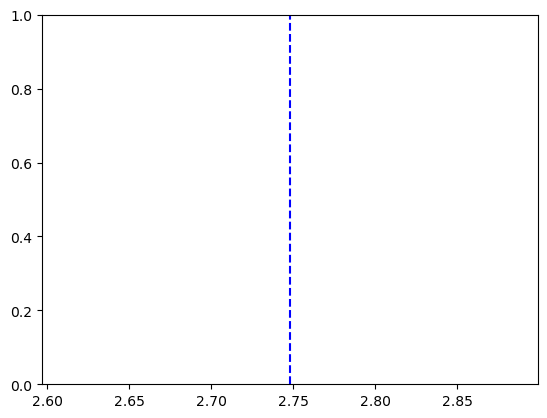

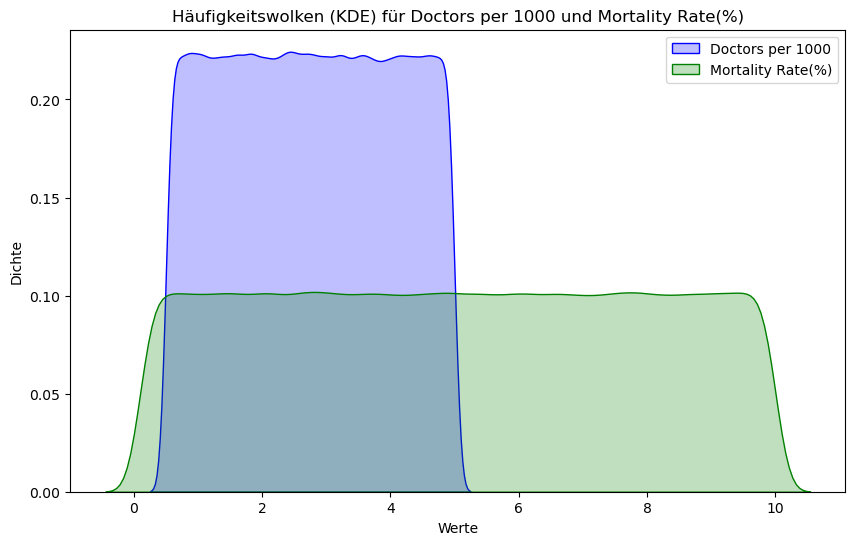

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Berechnen der Standardabweichung
durchschnitt_doctors= np.mean(df[column_names[11]])
durchschnitt_mortality= np.mean(df[column_names[6]])
std_dev_doctors = np.std(df[column_names[11]])  # Standardabweichung für 'Doctors per 1000'
std_dev_mortality = np.std(df[column_names[6]])  # Standardabweichung für 'Mortality Rate(%)'



# KDE Plot für Häufigkeitswolken (Density Plot)
# Hinzufügen der Mittelwertslinien
plt.axvline(durchschnitt_doctors, color='blue', linestyle='--', label=f'Mittelwert Doctors per 1000: {durchschnitt_doctors:.2f}')

plt.figure(figsize=(10, 6))
sns.kdeplot(df[column_names[11]], fill=True, color='blue', label='Doctors per 1000')
sns.kdeplot(df[column_names[6]], fill=True, color='green', label='Mortality Rate(%)')

plt.title('Häufigkeitswolken (KDE) für Doctors per 1000 und Mortality Rate(%)')
plt.xlabel('Werte')
plt.ylabel('Dichte')
plt.legend()

plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

print(durchschnitt_mortality)
print(std_dev_mortality)
X=df[[column_names[11],column_names[12]]]
y=df[column_names[6]]
# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellinitialisierung
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modelltraining
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


5.049918859999999
2.859425099564118
Mean Squared Error: 10.943056116945733
Root Mean Squared Error: 3.308029038104976


In [10]:
print(durchschnitt_mortality)
print(std_dev_mortality)
X=df[[column_names[9], column_names[10],column_names[11],column_names[12]]]
y=df[column_names[6]]
# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Modellinitialisierung
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modelltraining
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


5.049918859999999
2.859425099564118
Mean Squared Error: 8.530520846965702
Root Mean Squared Error: 2.9207055392431642


In [7]:

import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=df[[column_names[9], column_names[10],column_names[11],column_names[12]]]
y=df[column_names[6]]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Scale input features and outputs to [0, 1]
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

# Fit output scaler on target variable
#y_train_scaled = output_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_train_scaled = output_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()


# Create an SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Combine preprocessing and model into a pipeline
model = make_pipeline(input_scaler, svr)

# Fit the model
model.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Rescale predictions back to the original range
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 8.1636


In [8]:
import joblib

# Modell speichern
joblib.dump(model, 'svr_model.pkl')

print("Modell gespeichert als 'svr_model.pkl'")


Modell gespeichert als 'svr_model.pkl'


In [43]:
#example
import random
random_int = random.randint(1, 100000)
print(random_int)
ex_input = df[[column_names[9], column_names[10],column_names[11],column_names[12]]].loc[random_int]
ex_output = model.predict( np.array(ex_input).reshape(1, -1))
print("input: ", ex_input)
print("output: ",ex_output)
print("supossed output: ", df[column_names[6]].loc[random_int])


44368
input:  Population Affected       648192.00
Healthcare Access (%)         82.17
Doctors per 1000               2.79
Hospital Beds per 1000         8.66
Name: 44368, dtype: float64
output:  [0.50752979]
supossed output:  8.61


C:\Users\glaed\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [126]:
print(df[column_names[14]].mean())
print(np.std(df[column_names[14]]))
print(df[column_names[2]].values)

print(column_names[10])

25010.313665
14402.272025950506
['Malaria' 'Ebola' 'COVID-19' ... 'Zika' 'Asthma' 'Asthma']
Healthcare Access (%)


In [127]:
smaller_df  = pd.DataFrame()
print(column_names[6])
rows=[]
limit_affordable =df[column_names[14]].mean()+np.std(df[column_names[14]])
for _, row in df.iterrows():
    #only consider respiratory
    if row[column_names[3]]=='Respiratory':
        #take the specific illness into consideration
        if row[column_names[2]]=='COVID-19':
            #only take suffiecent number of affected population into consideration
            if row[column_names[9]]> 50000:
                #only consider affordable treatments:
                if row[column_names[14]]<limit_affordable:
                    
            
                        #only consider childern
                        if row[column_names[7]]=='36-60':
                            rows.append(row)
                        
            
smaller_df = pd.concat([smaller_df, pd.DataFrame(rows)], ignore_index=True)
print(smaller_df.count())


Mortality Rate (%)
Country                               842
Year                                  842
Disease Name                          842
Disease Category                      842
Prevalence Rate (%)                   842
Incidence Rate (%)                    842
Mortality Rate (%)                    842
Age Group                             842
Gender                                842
Population Affected                   842
Healthcare Access (%)                 842
Doctors per 1000                      842
Hospital Beds per 1000                842
Treatment Type                        842
Average Treatment Cost (USD)          842
Availability of Vaccines/Treatment    842
Recovery Rate (%)                     842
DALYs                                 842
Improvement in 5 Years (%)            842
Per Capita Income (USD)               842
Education Index                       842
Urbanization Rate (%)                 842
dtype: int64


In [138]:
print(smaller_df.values[6])

['South Africa' 2010 'COVID-19' 'Respiratory' 18.06 4.76 7.96 '36-60'
 'Male' 74594 93.04 4.46 5.08 'Surgery' 21499 'Yes' 69.01 3790 1.07 87846
 0.55 48.4]


Mean Squared Error: 8.8381
R²: -0.0058
Mean Absolute Error: 2.5944


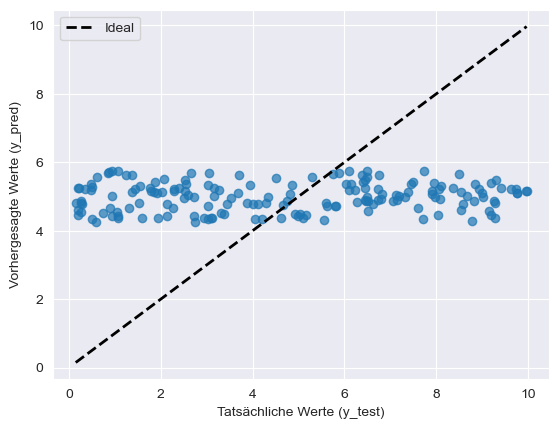

In [133]:

import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
X=smaller_df[[column_names[11]]]
y=smaller_df[column_names[6]]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scale input features and outputs to [0, 1]
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

# Fit output scaler on target variable
#y_train_scaled = output_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_train_scaled = output_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()


# Create an SVR model with RBF kernel
svr = SVR(kernel='rbf', C=10, epsilon=0.001)

# Combine preprocessing and model into a pipeline
model = make_pipeline(input_scaler, svr)

# Fit the model
model.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Rescale predictions back to the original range
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Tatsächliche Werte (y_test)')
plt.ylabel('Vorhergesagte Werte (y_pred)')
plt.legend()
plt.show()


In [73]:
import joblib

# Modell speichern
joblib.dump(model, 'svr_model_minimized_age0-18.pkl')

print("Modell gespeichert als 'svr_model_minimized_age0-18.pkl'")


Modell gespeichert als 'svr_model_minimized_age0-18.pkl'
